<a href="https://colab.research.google.com/github/pathilink/alura_time_series/blob/main/notebook/3_chocolura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alucar - Chocolura

## Libraries

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline 
from matplotlib import pyplot as plt


## Data

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_choco = pd.read_csv("drive/MyDrive/Alura/Time Series/chocolura.csv")
df_choco.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [4]:
# Rename columns

df_choco.rename(columns={'mes': 'month', 'vendas': 'sales'}, inplace=True)

In [5]:
print(f'Shape: {df_choco.shape[0]} rows and {df_choco.shape[1]} columns.')

Shape: 24 rows and 2 columns.


In [6]:
print('Number of null data per column:')
df_choco.isna().sum()

Number of null data per column:


month    0
sales    0
dtype: int64

In [7]:
print('Variable types:') 
df_choco.dtypes

Variable types:


month    object
sales     int64
dtype: object

In [8]:
# Convert object column to datetime

df_choco['month'] = pd.to_datetime(df_choco['month'])
df_choco.dtypes

month    datetime64[ns]
sales             int64
dtype: object

### Decomposing

In [9]:
df_choco['increase'] = df_choco['sales'].diff()
df_choco['acceleration'] = df_choco['increase'].diff()
df_choco.head()

,month,sales,increase,acceleration
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


In [10]:
def plot_comparison(x, y1, y2, y3, dataset, title1, title2, title3):
  plt.figure(figsize=(16, 16))
  sns.set_palette('Accent')
  sns.set_style('darkgrid')

  ax1 = plt.subplot(3, 1, 1) # (number of graphs, number of parts, order of graphs)
  ax1.set_title(title1, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)
  
  ax2 = plt.subplot(3, 1, 2)
  ax2.set_title(title2, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y2, data=dataset)


  ax3 = plt.subplot(3, 1, 3)
  ax3.set_title(title3, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y3, data=dataset)

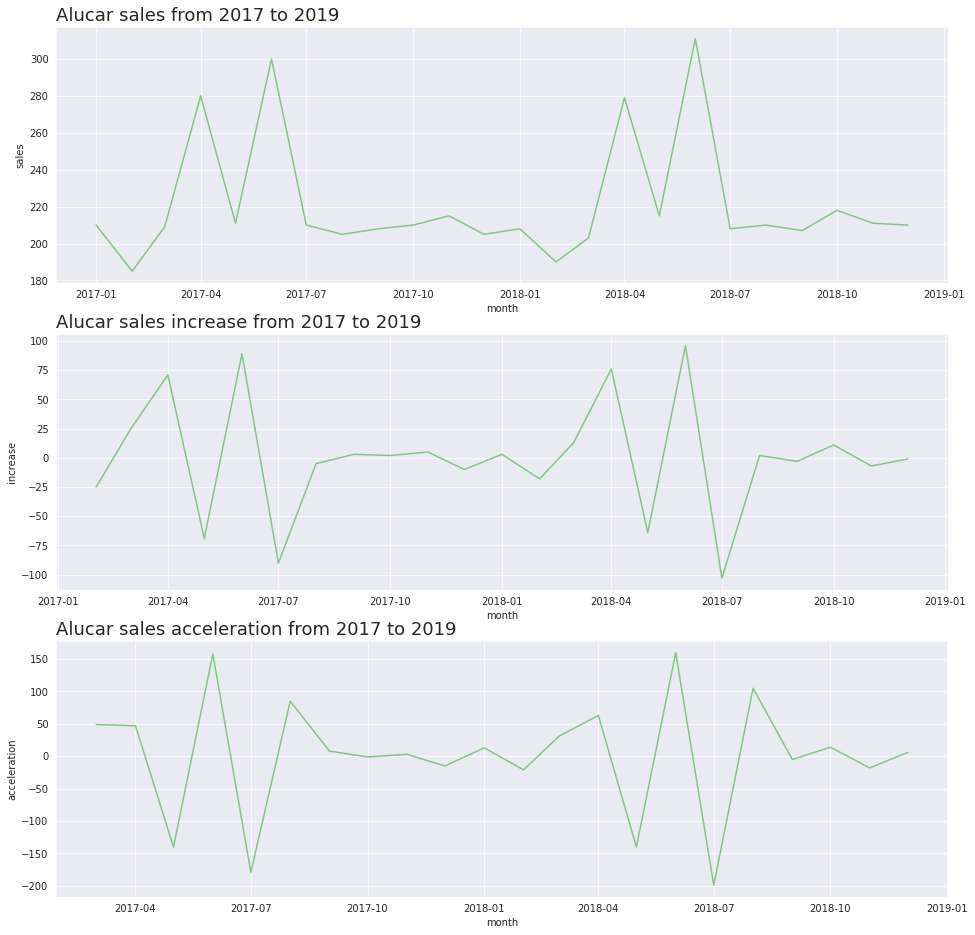

In [11]:
plot_comparison(
    'month', 
    'sales', 
    'increase', 
    'acceleration', 
    df_choco, 
    'Alucar sales from 2017 to 2019',
    'Alucar sales increase from 2017 to 2019',
    'Alucar sales acceleration from 2017 to 2019'
    )

**Seasonality**: repetition of a pattern within a specific period of time.

## Daily sales - October and November

In [12]:
df_daily_sales = pd.read_csv("drive/MyDrive/Alura/Time Series/vendas_por_dia.csv")
df_daily_sales.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [13]:
# Rename columns

df_daily_sales.rename(columns={'dia': 'day', 'vendas': 'sales'}, inplace=True)

In [14]:
print(f'Shape: {df_daily_sales.shape[0]} rows and {df_daily_sales.shape[1]} columns.')

Shape: 61 rows and 2 columns.


In [15]:
print('Number of null data per column:')
df_daily_sales.isna().sum()

Number of null data per column:


day      0
sales    0
dtype: int64

In [16]:
print('Variable types:') 
df_daily_sales.dtypes

Variable types:


day      object
sales     int64
dtype: object

In [17]:
df_daily_sales['day'] = pd.to_datetime(df_daily_sales['day'])
df_daily_sales.dtypes

day      datetime64[ns]
sales             int64
dtype: object

In [18]:
df_daily_sales['increase'] = df_daily_sales['sales'].diff()
df_daily_sales['acceleration'] = df_daily_sales['increase'].diff()
df_daily_sales.head()

,day,sales,increase,acceleration
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


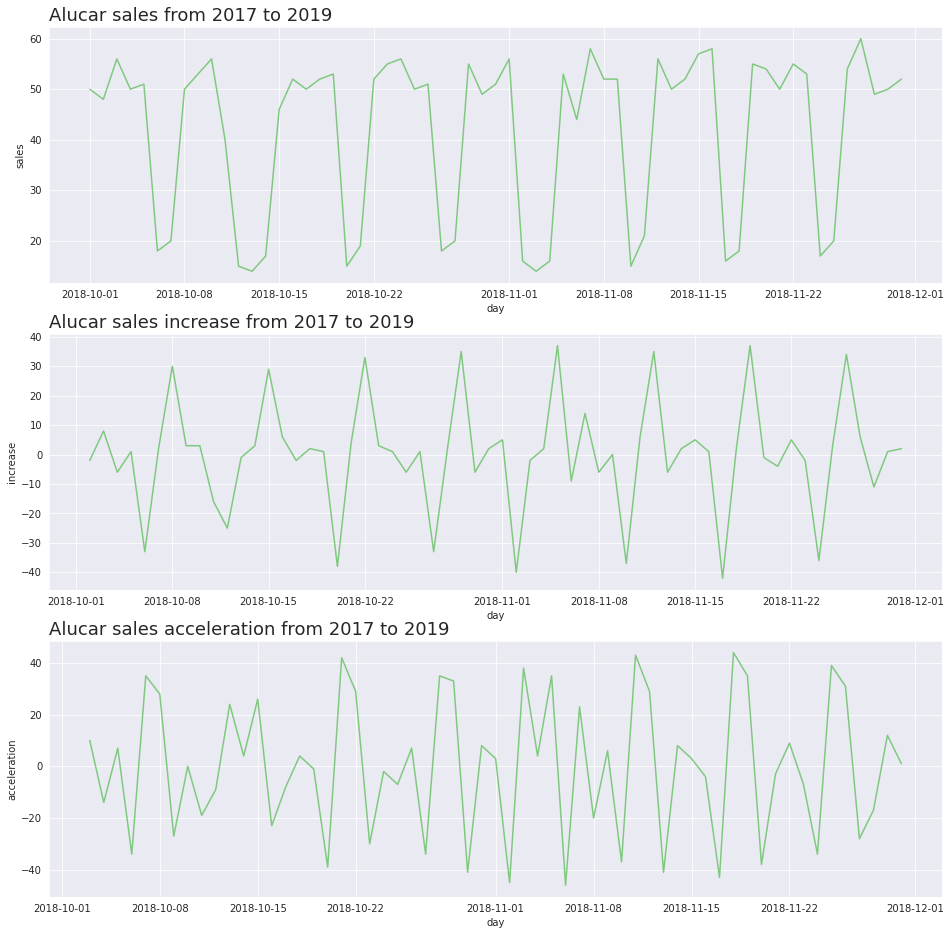

In [19]:
plot_comparison(
    'day', 
    'sales', 
    'increase', 
    'acceleration', 
    df_daily_sales, 
    'Alucar sales from 2017 to 2019',
    'Alucar sales increase from 2017 to 2019',
    'Alucar sales acceleration from 2017 to 2019'
    )

### Analyzing the seasonality

In [20]:
df_daily_sales['weekday'] = df_daily_sales['day'].dt.day_name()
df_daily_sales.head()

,day,sales,increase,acceleration,weekday
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [21]:
df_daily_sales['weekday'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [22]:
weekday_short = {'Monday':'Mon', 'Tuesday':'Tue', 'Wednesday':'Wed', 
                 'Thursday':'Thu', 'Friday':'Fri', 'Saturday':'Sat',
                 'Sunday':'Sun'
                }

In [23]:
df_daily_sales['weekday'] = df_daily_sales['weekday'].map(weekday_short)
df_daily_sales.head(14)

,day,sales,increase,acceleration,weekday
0,2018-10-01,50,NaN,NaN,Mon
1,2018-10-02,48,-2.0,NaN,Tue
2,2018-10-03,56,8.0,10.0,Wed
3,2018-10-04,50,-6.0,-14.0,Thu
4,2018-10-05,51,1.0,7.0,Fri
5,2018-10-06,18,-33.0,-34.0,Sat
6,2018-10-07,20,2.0,35.0,Sun
7,2018-10-08,50,30.0,28.0,Mon
8,2018-10-09,53,3.0,-27.0,Tue
9,2018-10-10,56,3.0,0.0,Wed


In [24]:
# Grouping
grouped_sales = df_daily_sales.groupby('weekday')['sales', 'increase', 'acceleration'].mean().round()
grouped_sales

<ipython-input-24-bfe8c476f4fa>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_sales = df_daily_sales.groupby('weekday')['sales', 'increase', 'acceleration'].mean().round()


,sales,increase,acceleration
weekday,,,
Fri,45.0,-7.0,-5.0
Mon,52.0,34.0,31.0
Sat,16.0,-28.0,-20.0
Sun,19.0,3.0,31.0
Thu,51.0,-2.0,-3.0
Tue,52.0,-1.0,-34.0
Wed,53.0,1.0,2.0


### Correlation of daily sales

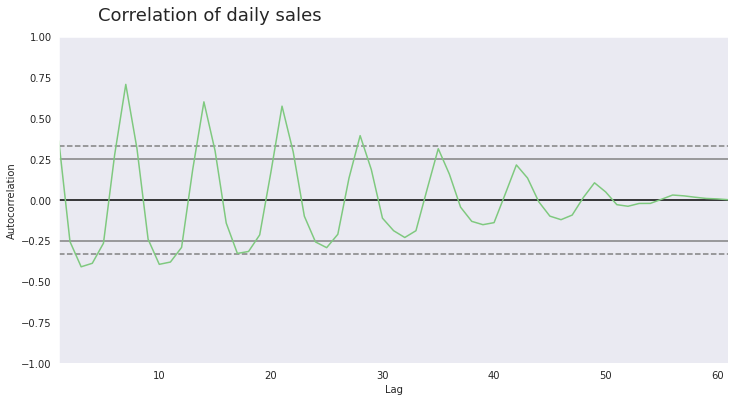

In [25]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlation of daily sales', fontsize=18, x=0.3, y=0.95)  # x and y: legend position
pd.plotting.autocorrelation_plot(df_daily_sales['sales'])
ax = ax

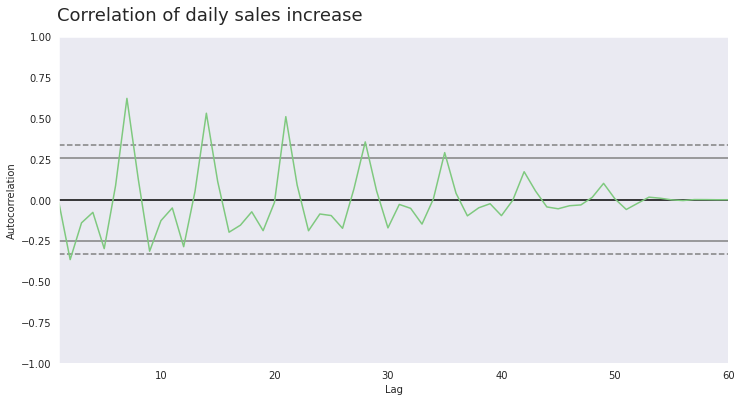

In [26]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlation of daily sales increase', fontsize=18, x=0.3, y=0.95)  
pd.plotting.autocorrelation_plot(df_daily_sales['increase'][1:])
ax = ax

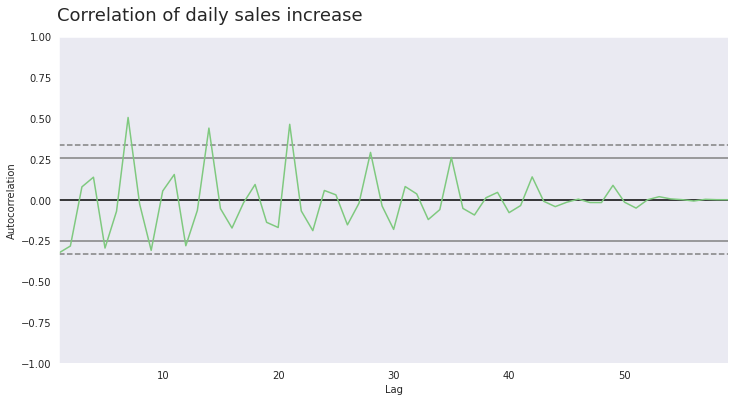

In [27]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlation of daily sales increase', fontsize=18, x=0.3, y=0.95)  
pd.plotting.autocorrelation_plot(df_daily_sales['acceleration'][2:])
ax = ax

## statsmodel

In [28]:
# Import new library

from statsmodels.tsa.seasonal import seasonal_decompose

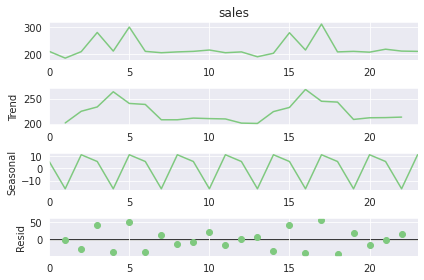

In [30]:
result = seasonal_decompose(df_choco['sales'],  period=3)
ax = result.plot()

In [31]:
observation = result.observed
tendency = result.trend
seasonality = result.seasonal
noise = result.resid

In [32]:
data = ({
       'observation':observation,
       'tendency':tendency, 
       'seasonality':seasonality,
       'noise':noise
})
df_result = pd.DataFrame(data)
df_result.head()

,observation,tendency,seasonality,noise
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


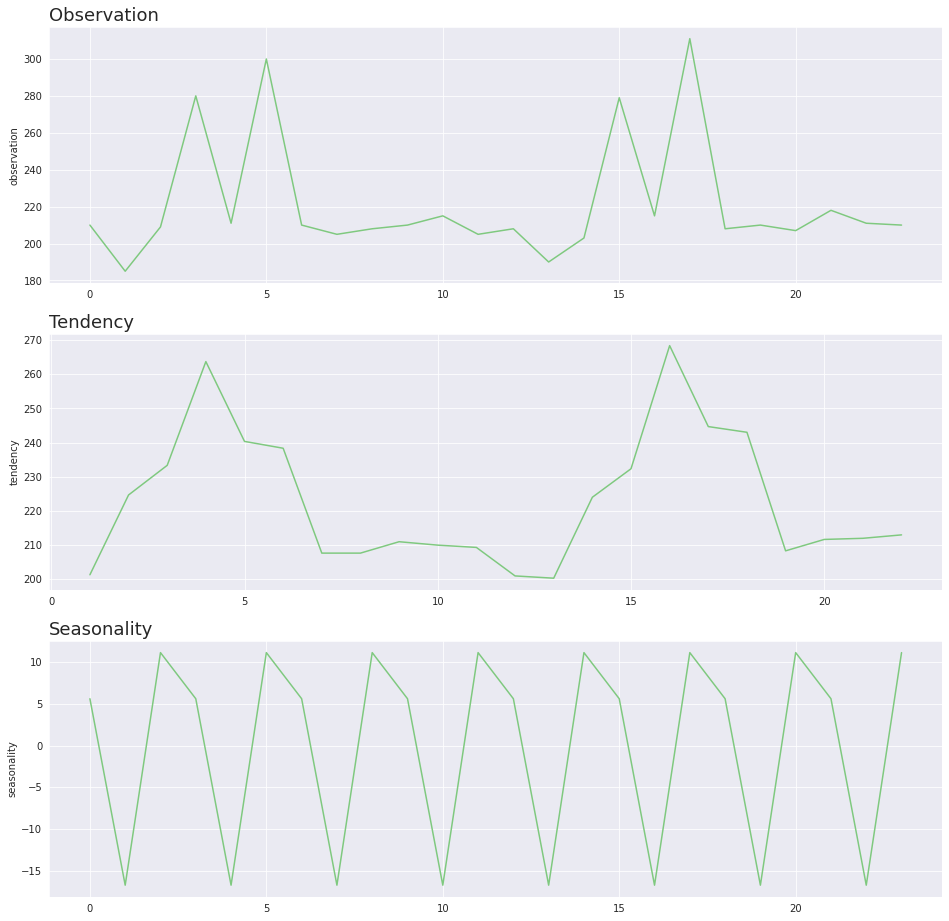

In [34]:
plot_comparison(df_result.index,                            # index
                'observation',	'tendency',	'seasonality',  # ys
                df_result,                                  # dataset
                'Observation',	'Tendency',	'Seasonality',  # titles
                )